In [1]:
import sys
sys.path.append('/Volumes/Samsung_T5/saturnx/')
import pathlib
import glob
import saturnx as sx
import logging

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
lc_list = '/Volumes/Samsung_T5/saturnx/examples/outputs/analysis/0100320101/lc_list_E0.5_10.0_T0.0078125.pkl'

In [3]:
output_dir = '/Volumes/Samsung_T5/saturnx/examples/outputs/'

In [4]:
sx.make_power(lc_list,destination=output_dir,
              tseg=128.,override=True)

INFO: 2021-03-07 03:39:28,856: ************************************************************************
INFO: 2021-03-07 03:39:28,858: ************************       make_power       ************************
INFO: 2021-03-07 03:39:28,859: ************************************************************************
INFO: 2021-03-07 03:39:28,860: 
INFO: 2021-03-07 03:39:28,860: Settings:
INFO: 2021-03-07 03:39:28,861: ------------------------------------------------------------
INFO: 2021-03-07 03:39:28,861: Lightcurve list file: lc_list_E0.5_10.0_T0.0078125.pkl
INFO: 2021-03-07 03:39:28,862: Selected time segment: 128.0 s
INFO: 2021-03-07 03:39:28,863: Log file name: /Volumes/Samsung_T5/kronos/examples/outputs/logs/make_power_D7_3_2021_T3_39
INFO: 2021-03-07 03:39:28,863: ------------------------------------------------------------
INFO: 2021-03-07 03:39:28,864: 
INFO: 2021-03-07 03:39:28,864: Processing lightcurve: /Volumes/Samsung_T5/kronos/examples/outputs/analysis/0100320101/lc_list_E0.

===> Splitting Segment
===> Splitting Segment
LightcurveList saved in /Volumes/Samsung_T5/kronos/examples/outputs/analysis/0100320101/lc_list_E0.5_10.0_T0.0078125_128.0.pkl
PowerList saved in /Volumes/Samsung_T5/kronos/examples/outputs/analysis/0100320101/power_list_E0.5_10.0_T0.0078125_128.0.pkl
Power without errors
Power without errors
Power without errors
Power without errors
Power without errors


INFO: 2021-03-07 03:39:29,141: Done!


PowerSpectrum saved in /Volumes/Samsung_T5/kronos/examples/outputs/analysis/0100320101/power_E0.5_10.0_T0.0078125_128.0.pkl


1

In [5]:
wf = pathlib.Path(output_dir)/'analysis'/'0100320101'

In [6]:
lc_list_file = glob.glob(str(wf/'lc_list_*.pkl'))[0]
pw_list_file = glob.glob(str(wf/'power_list_*.pkl'))[0]
pw_file = glob.glob(str(wf/'power_E*.pkl'))[0]

In [7]:
pw_list = sx.PowerSpectrum.load(pw_list_file)

In [8]:
pw_list.info()

,df,nf,n_bins,a0,count_rate,frac_rms,frac_rms_err,leahy_norm,rms_norm,weight,min_en,max_en,mission
0,0.00781,63.97952,16384,584510.0,4565.02310,0.300237,None,None,None,1,0.5,10.0,NICER
1,0.00781,63.97952,16384,592868.0,4630.29908,0.295619,None,None,None,1,0.5,10.0,NICER
2,0.00781,63.97952,16384,581539.0,4541.81959,0.298500,None,None,None,1,0.5,10.0,NICER
3,0.00781,63.97952,16384,574483.0,4486.71223,0.294068,None,None,None,1,0.5,10.0,NICER
4,0.00781,63.97952,16384,591119.0,4616.63939,0.303416,None,None,None,1,0.5,10.0,NICER


In [9]:
for pw in pw_list:
    sx.print_meta_data(pw)
    print('-'*72)

PW_CRE_MODE: Power computed from Lightcurve
TIME_RES: 0.0078125
SEG_DUR: 128.0
EVT_FILE_NAME: ni0100320101_0mpu7_cl_bc_bdc.evt.gz
DIR: /Volumes/Seagate/NICER_data/Cygnus_X1/0100320101/xti/event_cl
MISSION: NICER
INFO_FROM_HEADER:
--- OBJECT: Cyg_X-1
--- TELESCOP: NICER
--- INSTRUME: XTI
--- OBS_ID: 0100320101
--- RA_OBJ: 299.5922
--- DEC_OBJ: 35.20114
--- CREATOR: axBary - 2.14
--- DATE: 2020-10-18T23:55:17
--- SOFTVER: Hea_10Oct2017_V6.22.1_NICER_2018-03-01_V003
--- CALDBVER: xti20180226
--- GCALFILE: nixtiflightpi20170601v006.fits
--- DATE-OBS: 2017-06-30T16:02:31
--- DATE-END: 2017-06-30T16:26:54
--- TSTART: 110304084.671758
--- TSTOP: 110305547.714284
--- MJDREF: None
--- MJDREFI: 56658
--- MJDREFF: 0.000777592592592593
--- TIMEZERO: 0.0
--- LEAPINIT: 2
--- CLOCKAPP: True
--- ONTIME: 719
--- EXPOSURE: 719
--- NAXIS2: 3308165
--- TIMESYS: TDB
N_GTIS: 4
GTI_INDEX: 0
N_SEGS: 4
SEG_INDEX: 0
N_ACT_DET: 50
INACT_DET_LIST: [11, 14, 20, 22, 34, 60]
PW_CRE_DATE: 2021-3-7,2:39:29
-----------

In [10]:
leahy_power = sx.PowerSpectrum.load(pw_file)

In [11]:
logging.getLogger().setLevel(level=logging.INFO)

Done!


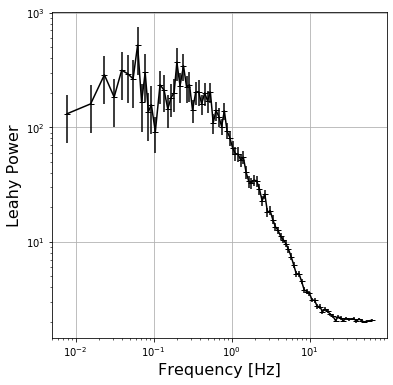

In [12]:
leahy_power.rebin().plot(marker='_')